## In this script we need to get a quadrant, split it in 10x10 images. Then we need the training image, split it in 10x10 with the corresponding coral code

In [1]:
import os
import numpy as np
import pandas as pd
import scipy
from statistics import mode
from skimage import io
from skimage import color
from skimage import util

import matplotlib.pyplot as plt


%matplotlib inline

### 2 images of same dimensions (1 photo, 1 tagged) ==> small images of nxn size and 1 species indicator

In [2]:
coral_photo = io.imread('/Users/gus/code/coral_id/test_image.png', )
coral_tags = io.imread('/Users/gus/code/coral_id/test_polygons.png', )

/Users/gus/anaconda/envs/imagenv/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


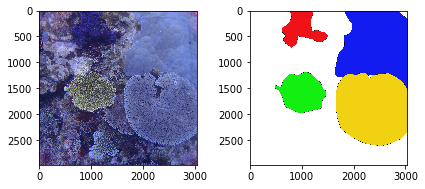

In [3]:
plt.subplot(121)
io.imshow(coral_photo)

plt.subplot(122)
io.imshow(coral_tags)

plt.show()

In [4]:
def equalise_dimensions(image1, image2):
    '''make dimensions of both images the same'''
    image1 = image1[:image2.shape[0],:,:]
    image1 = image1[:,:image2.shape[1],:]
    return image1

In [5]:
coral_photo.shape

(2980, 3038, 4)

In [6]:
coral_tags.shape

(2981, 3039, 4)

In [7]:
coral_tags = equalise_dimensions(coral_tags, coral_photo)

In [8]:
coral_tags.shape

(2980, 3038, 4)

In [9]:
def make_tiles(image, n):
    '''image in a standard format and k being the number 
    of sections in which to divide the images, n is the number of pixels in each side of the image'''
    m = n
    k = int(image.shape[0]/m)
    j = int(image.shape[1]/n)
    r = (image.shape[0] % m)
    s = (image.shape[1] % n)
    image_tiles = []
    for e in range(k):
        for f in range(j):
            im = image[int(e*m):int((e+1)*m),int(f*n):int((f+1)*n)]
            #io.imshow(im)
            #plt.show()
            image_tiles.append(im)
    return np.array(image_tiles)

In [10]:
coral_tiles = make_tiles(coral_photo, 300)

/Users/gus/anaconda/envs/imagenv/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


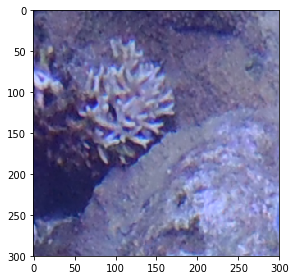

In [11]:
io.imshow(coral_tiles[15])
plt.show()

In [12]:
def make_indicator_from_tiles(image_with_tags, n):
    '''image in a standard format and k being the number 
    of sections in which to divide the images, n is the number of pixels in each side of the image'''
    #m = image.shape[0]/k # alternatively, we can define how big we want the resulting images, in pixels
    #n = image.shape[1]/k
    m = n
    k = int(image_with_tags.shape[0]/m)
    j = int(image_with_tags.shape[1]/n)
    r = (image_with_tags.shape[0] % m)
    s = (image_with_tags.shape[1] % n)
    
    indicator_list = []
    for e in range(k):
        for f in range(j):
            im = image_with_tags[int(e*m):int((e+1)*m),int(f*n):int((f+1)*n)]
            im = color.rgb2gray(im).ravel()
            indicator = mode(im)
            #print(indicator)
            indicator_list.append(indicator)
            "add something that makes a dictionary from those values and assign coral types"
    return indicator_list

In [13]:
def create_species_dictionary(indicator_list_from_tiles):
    species = ['acropora', 'porites', 'montastrea', 'oculina', 'other']
    values = np.unique(indicator_list_from_tiles)    
    species_dictionary = dict(zip(values, species))
    indicator_with_species = ['None' if x not in species_dictionary else species_dictionary[x] for x in indicator_list_from_tiles]
    return indicator_with_species

In [14]:
coral_indicator  = make_indicator_from_tiles(coral_tags, 300)

In [15]:
np.unique(coral_indicator)


array([0.16141255, 0.25756745, 0.69340706, 0.79424235, 1.        ])

In [16]:
coral_indicator_species = create_species_dictionary(coral_indicator)

In [17]:
len(coral_indicator_species)

90

In [18]:
X = coral_tiles
y = coral_indicator_species

In [19]:
np.save('./X.npy', X)
np.save('./y.npy', y)

In [ ]:
#indexes to re-form the images???